# **Plotting Confusion Matrix Exercise**

_John Andrew Dixon_

---

**Setup**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Remote URL to data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTvYsiM0huszmpSKoHmkPURxSeCGxnCL0dPSMngtc_ij2E3jXgsd7Cqj4c6zxauMqYyEQWIcwo9X1hd/pub?output=csv"
# Load the data and see info
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

---

## **Preliminary Steps**

### **Train-test split**

In [3]:
# Create the features matrix and the target vector
X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

In [4]:
# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### **Decision Tree Classifier**

In [5]:
# Create a decision tree classifier 
dtc = DecisionTreeClassifier(random_state=42)
# Fit it to the training data
dtc.fit(X_train, y_train)
# Get the score for both the training and testing data
print("Decision Tree Classifier")
print("Training set R2:", dtc.score(X_train, y_train))
print("Testing set R2:", dtc.score(X_test, y_test))

Decision Tree Classifier
Training set R2: 1.0
Testing set R2: 0.951048951048951


### **Bagging Classifier**

In [6]:
# Create a bagging classifier
bc = BaggingClassifier(random_state=42)
# Fit it to the training data
bc.fit(X_train, y_train)
# Get the score for both the training and testing data
print("Bagging Classifier")
print("Training set R2:", bc.score(X_train, y_train))
print("Testing set R2:", bc.score(X_test, y_test))

Bagging Classifier
Training set R2: 0.9929577464788732
Testing set R2: 0.951048951048951


### **Random Forest Classifier**

In [7]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)
# Fit it to the training data
rfc.fit(X_train, y_train)
# Get the score for both the training and testing data
print("Random Forest Classifier")
print("Training set R2:", rfc.score(X_train, y_train))
print("Testing set R2", rfc.score(X_test, y_test))

Random Forest Classifier
Training set R2: 1.0
Testing set R2 0.965034965034965


### **Results**

The Random Forest Classifier has the best results, according to its accuracy.

### **Confusion Matrix**

In [8]:
# Get the predictions from the best model
predictions = rfc.predict(X_test)

In [11]:
# Get the confusion matrix
cm = confusion_matrix(y_test.values, predictions)
cm

array([[87,  2],
       [ 3, 51]], dtype=int64)

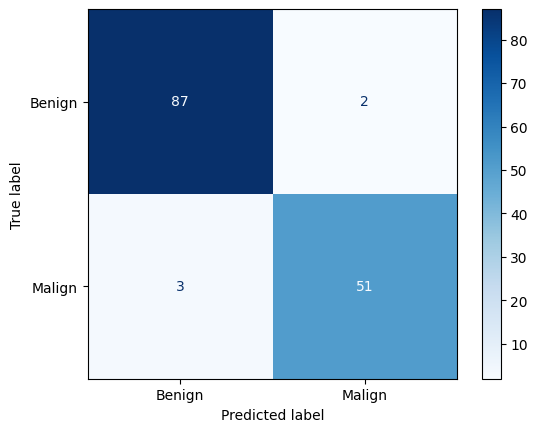

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, 
                                        predictions,
                                        display_labels=["Benign", "Malign"],
                                        cmap="Blues");